TASK 4 : 
Segment the leaf and add it on top of the space image. Resize both images if needed.

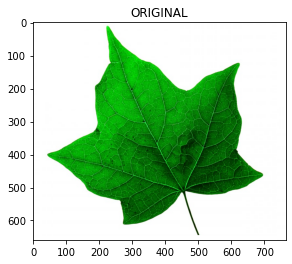

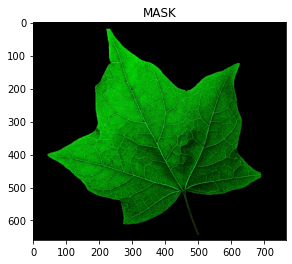

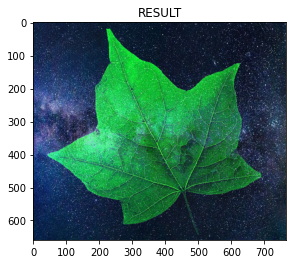

In [210]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show(title, image):
    plt.title(title)
    plt.imshow(image)
    plt.show()

im = cv2.imread('Assignment/Task 4/leaf.png')
mask = np.zeros(im.shape[:2], dtype=np.uint8)

show("ORIGINAL", im)

height, width = im.shape[:2]

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

rect = (30, 20, 660, 660)

cv2.grabCut(im, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0),0 ,1).astype("uint8")
im =im*mask2[:,:,np.newaxis]

space = cv2.imread('Assignment/Task 4/space.jpg')
space = cv2.resize(space, (width, height), interpolation=cv2.INTER_AREA)

res = cv2.bitwise_or(space, im)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

show("MASK", im)
show("RESULT", res)


TASK 5 : For each polygon detect its color and shape. The logic of shape detection shouldn’t depend on the
shape’s color.

1.9636363636363636


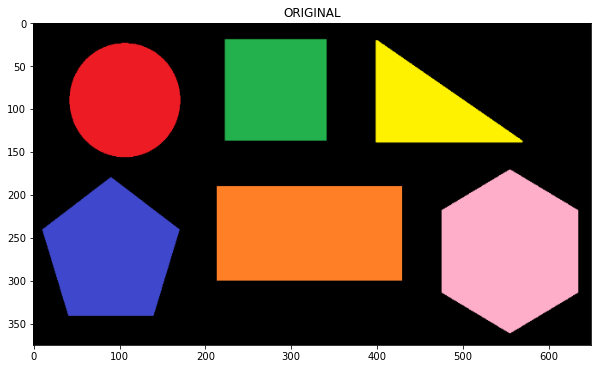

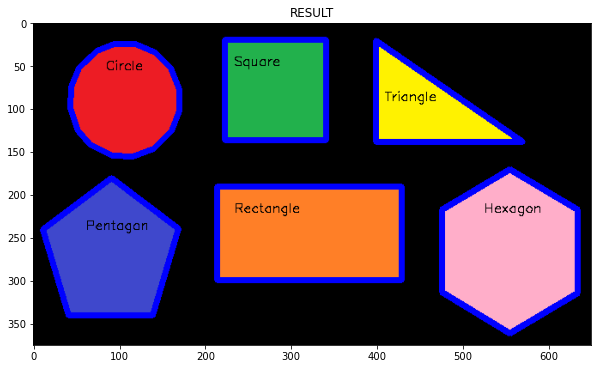

In [199]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

boundaries = [
	([35, 0, 160], [120, 115, 255]), #red
    ([70, 130, 0], [140, 255, 255]), #green
    ([0,0,178], [0, 255, 255]), #yellow
    ([100, 70, 60], [255, 210, 120]), #blue
    ([31, 0, 255], [180, 255, 255]), #orange
    ([100, 100, 60], [215, 200, 255]) #pink
]

colors = {'black': (0,0,0),'white': (255,255,255)}

font = cv2.FONT_HERSHEY_SIMPLEX

def show_with_matplotlib(color_img, title):
    plt.figure(figsize=(10, 10))
    img_RGB = color_img[:, :, ::-1]
    plt.imshow(img_RGB)
    plt.title(title)


shapes_img = cv2.imread("Assignment/Task 5/shapes.png")
shapes_img = cv2.resize(shapes_img, (650,375))

gray_img = cv2.cvtColor(shapes_img, cv2.COLOR_BGR2GRAY)

show_with_matplotlib(shapes_img, "ORIGINAL")

__, thresh = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

contour, __ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for ctn in contour:
    approx = cv2.approxPolyDP(ctn, 0.009*cv2.arcLength(ctn,True), True)
    cv2.drawContours(shapes_img, [approx], 0, 255 ,5)

    x = approx.ravel()[0]
    y = approx.ravel()[1]

    if len(approx) == 3:
        cv2.putText(shapes_img, "Triangle", (x+10,y+70), font, 0.5, colors['black'], 1, cv2.LINE_4)
        
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
    
        if aspectRatio >=0.94 and aspectRatio <=1.05:
            cv2.putText(shapes_img, "Square", (x+10, y+30), font, 0.5, colors['black'], 1, cv2.LINE_4)
        else:
            cv2.putText(shapes_img, "Rectangle", (x+20, y+30), font, 0.5, colors['black'], 1,cv2.LINE_4)
    
    elif len(approx) == 5:
        cv2.putText(shapes_img, "Pentagon", (x-30, y+60), font, 0.5, colors['black'], 1, cv2.LINE_4)

    elif len(approx) == 6:
        cv2.putText(shapes_img, "Hexagon", (x-30, y+50), font, 0.5, colors['black'], 1, cv2.LINE_4 )
    
    else:
        cv2.putText(shapes_img, "Circle", (x-10, y+30), font, 0.5, colors['black'], 1, cv2.LINE_4)
    
show_with_matplotlib(shapes_img, "RESULT")

cv2.destroyAllWindows()


for (lower, upper) in boundaries:
	lower = np.array(lower, dtype = "uint8")
	upper = np.array(upper, dtype = "uint8")
	mask = cv2.inRange(shapes_img, lower, upper)
	output = cv2.bitwise_and(shapes_img, shapes_img, mask = mask)
    
	cv2.imshow("colours", np.hstack([shapes_img, output]))
	cv2.waitKey(0)

cv2.destroyAllWindows()